# Case 1
Import dataset

In [3]:
import pandas as pd
data1 = pd.read_excel('dataset.xlsx', sheet_name='Caso_1')
#head() print first values to check if the data is loaded correctly
data1.head()

,Registro,Temperatura,Vibración,Presión,Estado
0,1,60.4,2.1,3.0,Normal
1,2,79.8,4.5,4.3,Advertencia
2,3,90.5,6.1,5.0,Falla
3,4,91.9,6.2,5.0,Falla
4,5,61.3,2.2,3.1,Normal


In [4]:
#data.info for information about the data
data1.info()
#dropna for removing NaN values
data = data1.dropna()
#shape for checking the shape of the data
data1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Registro     100 non-null    int64  
 1   Temperatura  100 non-null    object 
 2   Vibración    100 non-null    float64
 3   Presión      100 non-null    float64
 4   Estado       100 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


(100, 5)

In [5]:
#counting the number of unique values in the column "Estado"
data1["Estado"].value_counts()


Estado
Advertencia    33
Falla          33
Normal         32
NormaL          1
Fallaa          1
Name: count, dtype: int64

In [6]:
#normalize the column "Estado" to have consistent values
data1["Estado"] = data1["Estado"].replace({"NormaL": "Normal", "Fallaa": "Falla"})

#checking the unique values in the column "Estado" after normalization
data1["Estado"].value_counts()


Estado
Falla          34
Normal         33
Advertencia    33
Name: count, dtype: int64

KNN entrenamiento

In [7]:
from sklearn.preprocessing import StandardScaler
#replace commas with dots and convert to float
columnas_numericas = ["Temperatura", "Vibración", "Presión"]

data1[columnas_numericas] = data1[columnas_numericas].replace(',', '.', regex=True).astype(float)

#apply StandardScaler to the numeric columns
scaler = StandardScaler()
data1[columnas_numericas] = scaler.fit_transform(data1[columnas_numericas])

data1 = data1

data1.head()


,Registro,Temperatura,Vibración,Presión,Estado
0,1,-1.395531,-1.386476,-1.513731,Normal
1,2,0.213389,0.147661,0.233916,Advertencia
2,3,1.100783,1.170419,1.174956,Falla
3,4,1.216891,1.234341,1.174956,Falla
4,5,-1.320890,-1.322554,-1.379296,Normal


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = data1[['Temperatura', 'Vibración', 'Presión']]
y = data1['Estado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Precisión:", accuracy)
print("Matriz de Confusión:\n", confusion_mat)

nuevo_registro = [[78, 3.8, 4]]  # Temperatura = 78, Vibración = 3.8, Presión = 4.0
nuevo_registro_escalado = scaler.transform(nuevo_registro)
print(nuevo_registro_escalado)
prediccion = knn.predict(nuevo_registro_escalado)
print("Predicción para el nuevo registro:", prediccion[0])


Precisión: 1.0
Matriz de Confusión:
 [[6 0 0]
 [0 7 0]
 [0 0 7]]
[[ 0.06410801 -0.29979596 -0.16938728]]
Predicción para el nuevo registro: Advertencia


/home/jacobo/Escritorio/projects/ML_mechanical_maintenance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/jacobo/Escritorio/projects/ML_mechanical_maintenance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Case 2
import dataset for sheet 2

In [9]:
import pandas as pd
data2 = pd.read_excel('dataset.xlsx', sheet_name='Caso_2')
#head() for checking the first values
data2.head()

,Registro,Horas de operación,Temperatura ambiente,Carga operativa,Mantenimiento
0,1.0,1926.0,26.0,0.79,Requiere mantenimiento
1,2.0,1660.0,31.0,0.65,No requiere mantenimiento
2,3.0,1930.0,32.0,0.88,No requiere mantenimiento
3,4.0,1895.0,27.0,0.63,No requiere mantenimiento
4,5.0,1844.0,34.0,0.95,No requiere mantenimiento


In [10]:
#data.info for information about the data
data2.info()
#shape for checking the shape of the data
data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Registro              47 non-null     float64
 1   Horas de operación    47 non-null     float64
 2   Temperatura ambiente  47 non-null     float64
 3   Carga operativa       47 non-null     float64
 4   Mantenimiento         47 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


(50, 5)

In [11]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Horas de operación', 'Temperatura ambiente', 'Carga operativa']
data_to_scale = data2[numerical_cols]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

if 'Mantenimiento' in data2.columns:
    scaled_data2 = pd.concat([scaled_df, data2['Mantenimiento']], axis=1)
else:
    scaled_data2 = scaled_df

scaled_data2.head()

,Horas de operación,Temperatura ambiente,Carga operativa,Mantenimiento
0,1.370833,-0.495695,0.241743,Requiere mantenimiento
1,0.641519,0.603252,-1.094954,No requiere mantenimiento
2,1.381800,0.823041,1.101048,No requiere mantenimiento
3,1.285837,-0.275906,-1.285911,No requiere mantenimiento
4,1.146006,1.262620,1.769397,No requiere mantenimiento


In [12]:
normalized_df = scaled_data2.dropna()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = normalized_df[['Horas de operación', 'Temperatura ambiente', 'Carga operativa']]
y = normalized_df['Mantenimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("KNN with k=",k)
    print("Accuracy: ", accuracy)
    #report indicator for classification
    # print(report)
    print("-" * 20)

new_data = pd.DataFrame({
    'Horas de operación': [1926],
    'Temperatura ambiente': [26],
    'Carga operativa': [0.79]
})
new_data_scaled = scaler.transform(new_data)
print(new_data_scaled)

best_k = 5
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

predicted_maintenance = best_knn.predict(new_data_scaled)
print("Predicción de mantenimiento: ", predicted_maintenance[0])

KNN with k= 3
Accuracy:  0.6
--------------------
KNN with k= 5
Accuracy:  0.7
--------------------
KNN with k= 7
Accuracy:  0.6
--------------------
KNN with k= 9
Accuracy:  0.4
--------------------
[[ 1.37083254 -0.49569526  0.24174312]]
Predicción de mantenimiento:  Requiere mantenimiento


/home/jacobo/Escritorio/projects/ML_mechanical_maintenance/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jacobo/Escritorio/projects/ML_mechanical_maintenance/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jacobo/Escritorio/projects/ML_mechanical_maintenance/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

# Case 3
import dataset 3

In [14]:
import pandas as pd
data3 = pd.read_excel('dataset.xlsx', sheet_name='Caso_3')
#head() for checking the first values
data3.head()

,Registro,Vibración promedio,Amplitud máxima,Frecuencia (Hz)
0,1.0,3.2,8.8,56
1,2.0,5.8,7.5,50
2,3.0,4.8,8.6,53
3,4.0,4.2,8.3,53
4,5.0,2.2,6.4,54


In [15]:
#data.info for information about the data
data3.info()
#shape for checking the shape of the data
data3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Registro            49 non-null     float64
 1   Vibración promedio  49 non-null     object 
 2   Amplitud máxima     49 non-null     object 
 3   Frecuencia (Hz)     49 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.7+ KB


(50, 4)

In [17]:
#check nan values
data3.isnull().sum()

Registro              1
Vibración promedio    1
Amplitud máxima       1
Frecuencia (Hz)       1
dtype: int64

In [18]:
data3['Vibración promedio'] = pd.to_numeric(data3['Vibración promedio'], errors='coerce')
data3['Amplitud máxima'] = pd.to_numeric(data3['Amplitud máxima'], errors='coerce')
data3['Frecuencia (Hz)'] = pd.to_numeric(data3['Frecuencia (Hz)'], errors='coerce')


data3.dropna(inplace=True)

In [19]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Vibración promedio', 'Amplitud máxima', 'Frecuencia (Hz)']
data_to_scale = data3[numerical_cols]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

scaled_df.head()

,Vibración promedio,Amplitud máxima,Frecuencia (Hz)
0,-0.269551,1.529144,0.210359
1,1.745345,0.866995,-1.662517
2,0.970385,1.427275,-0.726079
3,0.505409,1.274471,-0.726079
4,-1.044511,0.306715,-0.413933


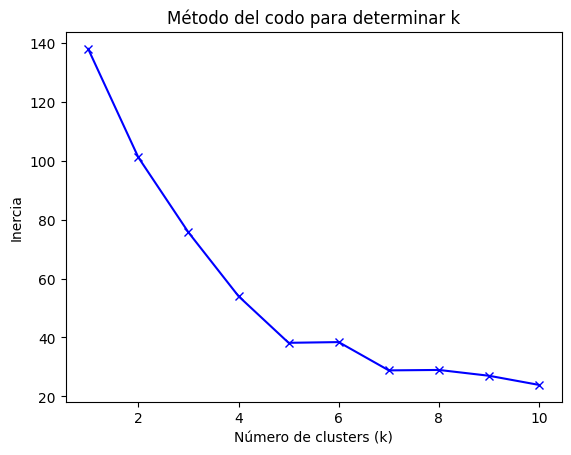

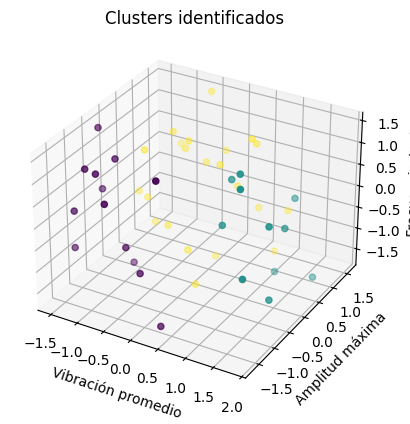

Registros en el cluster anómalo 1:

    Vibración promedio  Amplitud máxima  Frecuencia (Hz)  cluster
1             1.745345         0.866995        -1.662517        1
7             1.435361        -1.017584         1.458944        1
8             0.892889        -0.610107         0.210359        1
10            1.822841        -0.762911        -1.038225        1
11            1.280369         1.070733        -0.101787        1
23            1.125377         0.714191        -1.662517        1
30            1.745345        -1.475995        -0.101787        1
31            1.745345        -0.661042         0.522505        1
32            1.202873        -0.610107         1.458944        1
39            1.590353         0.153911        -0.101787        1
41            0.737897        -0.049827         0.834652        1


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


#initialize the KMeans model
inertias = []
silhouette_scores = []
k_range = range(1, 11)
#iterate over a range of k values
for k in k_range:
    #create the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)

    #adjust the model to the data
    kmeans.fit(scaled_df)

    #store the inertia
    inertias.append(kmeans.inertia_)


plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')
plt.show()

# Ejecutar K-Means con k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

# Asignar las etiquetas de cluster a los datos
scaled_df['cluster'] = kmeans.labels_


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_df['Vibración promedio'], scaled_df['Amplitud máxima'],
           scaled_df['Frecuencia (Hz)'], c=scaled_df['cluster'])
ax.set_xlabel('Vibración promedio')
ax.set_ylabel('Amplitud máxima')
ax.set_zlabel('Frecuencia (Hz)')
plt.title('Clusters identificados')
plt.show()


cluster_counts = scaled_df['cluster'].value_counts()
atypical_cluster = cluster_counts.idxmin()

print(f"Registros en el cluster anómalo {atypical_cluster}:\n")
print(scaled_df[scaled_df['cluster'] == atypical_cluster])

# Analizar los datos de estos registros para determinar si corresponden a
# condiciones de falla o desgaste acelerado.
# Por ejemplo, se puede ver si tienen valores más altos de vibración,
# amplitud o frecuencia que el resto de los registros.
# Mostrar los registros del cluster atípico

# 5. Conclusiones: Formular recomendaciones de mantenimiento basadas en la
# detección de anomalías.

# En base al análisis de los registros en el cluster atípico, se pueden formular
# recomendaciones de mantenimiento para evitar fallas o desgaste acelerado.
# Por ejemplo, se pueden recomendar inspecciones más frecuentes o cambios
# de componentes preventivos para los registros que caen en el cluster anómalo.


# Case 4

In [24]:
import pandas as pd
data4 = pd.read_excel('dataset.xlsx', sheet_name='Caso_4')
#head() for checking the first values
data4.head()

,Registro,Temperatura,Vibración,Velocidad (rpm)
0,1,88,4.5,1696
1,2,74,4.0,1536
2,3,67,2.3,1659
3,4,80,2.4,1508
4,5,78,1.6,1598


In [ ]:
#data.info for information about the data
data2.info()
#shape for checking the shape of the data
data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Registro              47 non-null     float64
 1   Horas de operación    47 non-null     float64
 2   Temperatura ambiente  47 non-null     float64
 3   Carga operativa       47 non-null     float64
 4   Mantenimiento         47 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


(50, 5)

In [30]:
data4.dropna(inplace=True)

In [27]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Temperatura', 'Vibración', 'Velocidad (rpm)']
data_to_scale = data4[numerical_cols]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

scaled_df

,Temperatura,Vibración,Velocidad (rpm)
0,0.060680,1.339633,1.546682
1,-0.152232,0.822400,-1.187482
2,-0.258687,-0.936192,0.914407
3,-0.060984,-0.832745,-1.665960
4,-0.091400,-1.660318,-0.127993
...,...,...,...
95,0.030264,1.753420,0.931496
96,0.151927,0.098274,-0.674826
97,-0.365143,-0.832745,0.367574
98,0.151927,1.856866,-1.512164


In [ ]:
#replace outliers using IQR method
def replace_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
  return df


#iterate through columns to replace outliers
for column in ['Temperatura', 'Vibración', 'Velocidad (rpm)']:
  scaled_df = replace_outliers_iqr(scaled_df, column)


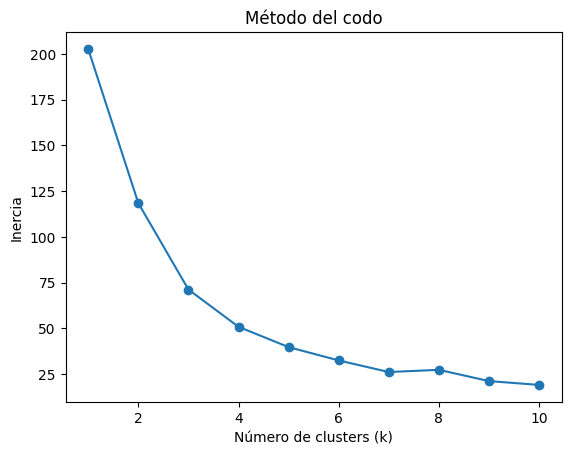

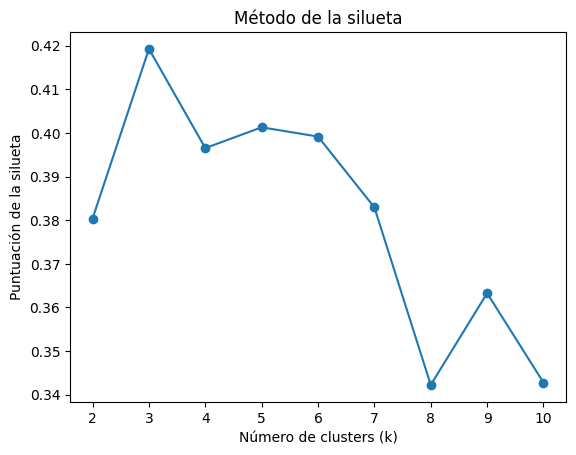

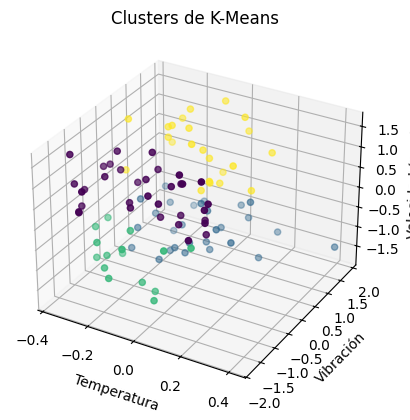

,Temperatura,Vibración,Velocidad (rpm)
cluster,,,
0,-0.105266,-0.808405,0.682204
1,-0.065804,0.822400,-1.097767
2,-0.158315,-1.039638,-0.825205
3,-0.070241,0.871875,0.866113


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()


#silhouette method for determining the optimal number of clusters
silhouette_avg = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg.append(silhouette_score(scaled_df, cluster_labels))

plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('Método de la silueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntuación de la silueta')
plt.show()



kmeans = KMeans(n_clusters=4, random_state=0)
scaled_df['cluster'] = kmeans.fit_predict(scaled_df)

#plot the clusters for better visualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_df['Temperatura'], scaled_df['Vibración'], scaled_df['Velocidad (rpm)'], c=scaled_df['cluster'])
ax.set_xlabel('Temperatura')
ax.set_ylabel('Vibración')
ax.set_zlabel('Velocidad (rpm)')
ax.set_title('Clusters de K-Means')
plt.show()

cluster_means = scaled_df.groupby('cluster').mean()
cluster_means
# For each cluster, we can analyze the mean values of the features
# For example, a cluster with high temperature, high vibration, and high speed could correspond to a high-load regime.
# A cluster with low temperature, low vibration, and low speed could correspond to a low-load regime.
# A cluster with intermediate temperature, intermediate vibration, and intermediate speed could correspond to a warm-up regime.

# 5. Discussion and maintenance action proposals
# Based on the interpretation of the clusters:
# - Potential problems or anomalies in the equipment can be identified.
# - Maintenance actions can be proposed for each cluster, for example:
#   - High-load cluster: Schedule more frequent preventive maintenance for key components.
#   - Warm-up cluster: Monitor the equipment's temperature and investigate possible heat sources.
#   - Low-load cluster: Adjust the equipment's operating parameters to optimize energy consumption.
